In [33]:
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download fr_core_news_sm
!python -m nltk.downloader averaged_perceptron_tagger
!pip install --upgrade nltk
!pip install transformers
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 113.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [146]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import gutenberg
#from nltk import pos_tag
import random
#import spacy
from transformers import pipeline


# PROMPT GENERATION

## Random words

In [10]:
# Download the WordNet dataset
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Backups
nouns = list(wn.all_synsets('n'))
adjectives = list(wn.all_synsets('a'))
verbs = list(wn.all_synsets('v'))
random_noun = random.choice(nouns).lemmas()[0].name()
random_adjective = random.choice(adjectives).lemmas()[0].name()
random_verb = random.choice(verbs).lemmas()[0].name()

## Random words from famous artists

In [148]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [149]:
book_complete = gutenberg.words('austen-emma.txt')
austen_emma = ' '.join([word for word in book_complete if word.isalpha()])

In [15]:
nltk.data.path.append("/home/jovyan/nltk_data")  # Ensure the correct path is used
nltk.download('punkt')

nltk.download('averaged_perceptron_tagger', download_dir='/home/jovyan/nltk_data')
nltk.download('punkt_tab')  # This will download the missing tokenizer files

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [150]:
pipe = pipeline("token-classification", model="vblagoje/bert-english-uncased-finetuned-pos", device=0)

Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [151]:
def prompt_generation(text):

    def chunk_text(text, max_length=512):
        words = text.split()  # Split text into words
        chunks = []
        current_chunk = []
    
        # Iterate over words and form chunks
        for word in words:
            if len(" ".join(current_chunk + [word])) <= max_length:
                current_chunk.append(word)
            else:
                chunks.append(" ".join(current_chunk))
                current_chunk = [word]
                
        # Add the last chunk if it exists
        if current_chunk:
            chunks.append(" ".join(current_chunk))
        return chunks
        
    # Chunk the input text
    chunks = chunk_text(text)
    
    # Initialize lists to store words by POS
    nouns = []
    verbs = []
    adjectives = []
    
    # Process each chunk and classify POS
    for chunk in chunks:
        word_classification = pipe(chunk)
        
        for word in word_classification:
            pos = word.get('entity')
            word_text = word.get('word')
            
            if pos == 'NOUN':
                nouns.append(word_text)
            elif pos == 'VERB':
                verbs.append(word_text)
            elif pos == 'ADJ':
                adjectives.append(word_text)
                
    # Filter out tokenized words starting with ##
    nouns = [word for word in nouns if not word.startswith("##")]
    verbs = [word for word in verbs if not word.startswith("##")]
    adjectives = [word for word in adjectives if not word.startswith("##")]

    # Check if lists are non-empty before selecting random words
    prompt_components = []
    
    if adjectives:
        prompt_components.append(random.choice(adjectives))
    if nouns:
        prompt_components.append(random.choice(nouns))
    if verbs:
        prompt_components.append(random.choice(verbs))
    if adjectives:
        prompt_components.append(random.choice(adjectives))
    if nouns:
        prompt_components.append(random.choice(nouns))
    
    # Join the prompt components
    prompt = ' '.join(prompt_components)
    
    return prompt


In [152]:
random.seed(15)

prompt_generation(austen_emma)

'contrary subject hearing small law'

# IMAGE GENERATION

In [21]:
!pip install --upgrade diffusers accelerate transformers

  Using cached diffusers-0.31.0-py3-none-any.whl.metadata (18 kB)
  Using cached accelerate-1.1.1-py3-none-any.whl.metadata (19 kB)
  Using cached transformers-4.46.2-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached tokenizers-0.20.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached diffusers-0.31.0-py3-none-any.whl (2.9 MB)
Using cached accelerate-1.1.1-py3-none-any.whl (333 kB)
Using cached transformers-4.46.2-py3-none-any.whl (10.0 MB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
Using cached tokenizers-0.20.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)


In [22]:
import requests
from PIL import Image
from io import BytesIO
#from diffusers import StableDiffusionPipeline
import torch
from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [41]:
pipeline.to("cuda")

AttributeError: 'function' object has no attribute 'to'

In [30]:
def prompt_build(adj, noun, verb, adj2, noun2):
    prompt_components = [adj, noun, verb, adj2, noun2]
    prompt = ' '.join(prompt_components)
    return prompt

In [32]:
prompt = prompt_build(random_adj_austen_emma1, random_noun_austen_emma1, random_verb_austen_emma, random_adj_austen_emma2, random_noun_austen_emma2)
prompt

'really quite should there saw'

  0%|          | 0/50 [00:00<?, ?it/s]

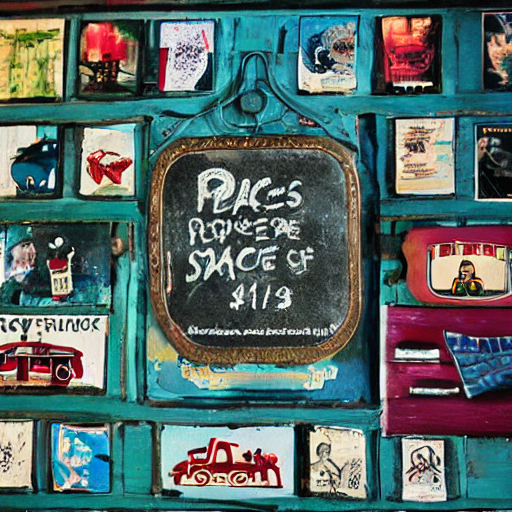

In [18]:
height = 512  # Set height
width = 512   # Set width
# Generate the image
image = pipeline(prompt, height=height, width=width).images[0]

# Show the image
image